In [85]:
#Building the binominal tree

In [86]:
import networkx as nw

In [87]:
import os
os.listdir()

['.ipynb_checkpoints',
 'helper_lab.py',
 'JU24 Binomial Trees in Option Pricing _helper.txt',
 'JU24 Binomial Trees in Option Pricing_1.html',
 'JU24 Binomial Trees in Option Pricing_2.html',
 'Python Lab 2 - Binominal Tree.html',
 'Python Lab 2 - Binominal Tree.ipynb',
 'Python Lab 2 - Distributions.ipynb',
 '__pycache__']

In [88]:
# Import math functions from NumPy
from numpy import *

#Import the helper file we have created
from helper_lab import plot_asset_path, plot_probability, plot_binomial_tree

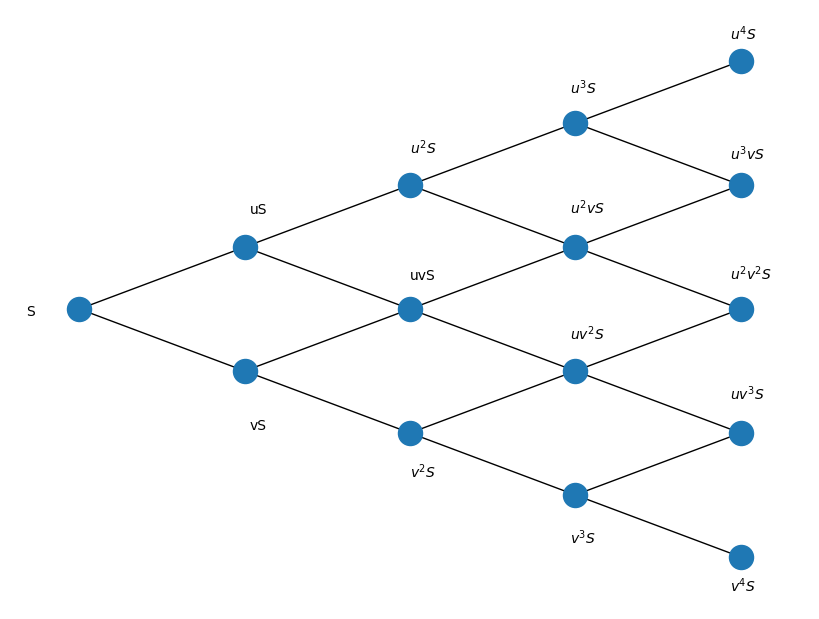

In [89]:
# Plot asset price path
plot_asset_path()

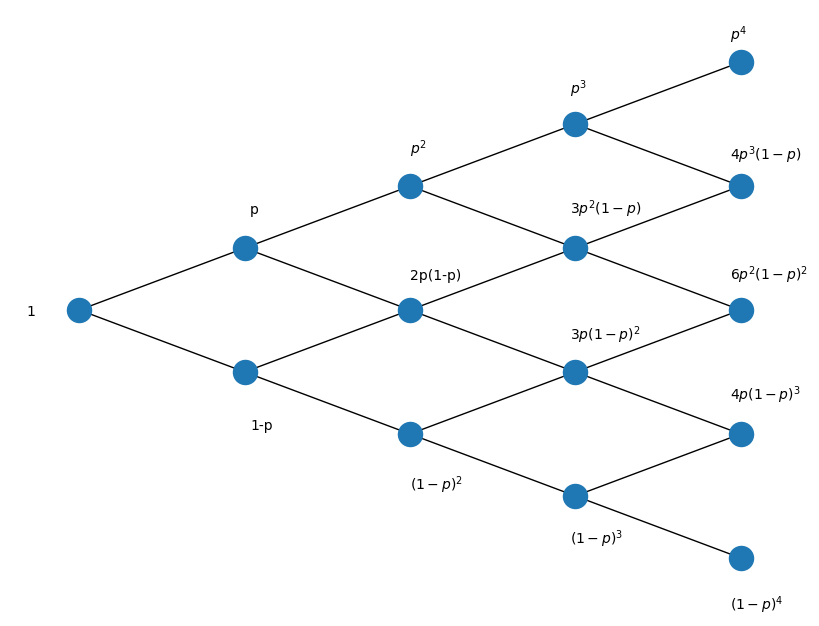

In [90]:
# Plot node probability
plot_probability()

In [1]:
#Create a user defined function
#ndarray comes from the numpy library deemed to be more efficient, we speak about an array of integers or floats.
#A NumPy array can hold elements of various numerical types and support multi-dimensional arrays.

def binomial_option(spot: float, strike: float, rate: float, sigma: float, time: float, steps: int, output: int=0)-> ndarray:
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    
    Params
    ------
    spot        int or float     - spot price - number, spot of the start
    strike      int or float     - strike price - number
    rate        float            - interest rate - %
    sigma       float            - volatility - %
    time        int or float     - expiration time - number
    steps       int              - number of trees - number
    output      int              - [0: underlying price, 1: payoff, 2: option value, 3: option delta] - number - very important
    
    *float type contain decimals, integer does not, it is a full round numbe*
    
    Returns
    -------
    out:        ndarray
    
    An array object of price, payoff, option value and delta specified by the output parameter above
    
    """
    
    # ** params
    ts = time/steps #like in the excel
    u = 1+sigma*sqrt(ts) #like in the excel
    v = 1-sigma*sqrt(ts) #like in the excel
    p = 0.5+rate*sqrt(ts)/(2*sigma) #like in the excel
    df = 1/(1+rate*ts) #like in the excel
    
    # ** initialize arrays
    underlying = zeros((steps+1, steps+1)) #stores the price of the underlying asset at each node in the binominal tree
    intrinsic_value = zeros((steps+1, steps+1)) #stores the intrinsic values of the option at each node
    V = zeros((steps+1, steps+1)) #Stores the IV of the option at each node. #Value if the option were exercised at that node, calculated backwards like in the excel.
    delta = zeros((steps+1, steps+1)) #stores the hedge ratios (delta values) at each node.
    
    # **Binomial loop

    # **forward loop, setting up the underlying prices and intrinsic value at each node
    
    for j in range(steps+1):
            #j = specific node at time step i, we go step+1 = 1 step forward
            
        for i in range(j+1):
            #i is the current time step, we go step+1 = 1 step forward
            
            #i-j = number of "up" movements:
            #If i is the total number of steps and j is the number of down movements, then i-j = number of up movements.
            #j = number of "down" movements
            
            underlying[i,j] = spot*power(v,i)*power(u,j-i) 
            
            #calculates the underlying at a specific node in Si*p^n*(1-p)^n
            #for ts = 2, calculates underlying with 2 step up, then 2 step down i.e. 6p^2(1-p)^2 in the first plot.
            
            intrinsic_value[i,j] = maximum(underlying[i,j] - strike, 0) 
            
            #calculates the underlying at a specific node
            #i and j are setting up the movements up and down, so here for each mov up and mov down at each node.
 
    # **reverse loop, calculating option price ar each node backwards
    
    for j in range(steps+1, 0, -1): #Outer loop #starts in the step+1, and goes backward of -1 step by steps of 1
        
        for i in range(j): # Inner loop #for each node at time step i
            
            if (j==steps+1): #if the current j is equal to steps + 1 which is the final time step
                V[i,j-1] = intrinsic_value[i,j-1] #then option price = intrinsic value
                
                #AND still at last timestep;
                
                if (underlying[i,j-1]>=strike): #if underlying > strike, then delta is 1 
                    delta[i,j-1] = 1
                else:
                    delta[i,j-1] = 0  #else 0 because option has 0 value so delta is 0
                    
            #ELSE if we are not at maturity node
            
            else:
                
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j]) 
                
                #option value formula like in excel
                # = (discount factor * (p * option price up) + (1-p)* option price down)
                
                #same logic with delta
                delta[i,j-1] = (V[i,j]-V[i+1,j])/(underlying[i,j]-underlying[i+1,j]) 
              
    #using the around function of numpy to round the results to either 2 of 4 decimals
    results = around(underlying,2), around(intrinsic_value,2), around(V,2), around(delta, 4)
    
    return results[output]

NameError: name 'ndarray' is not defined

In [138]:
# Asset price

underlying = binomial_option(100,100,0.05,0.2,1,4,0) #0 to return the asset price
underlying

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [139]:
# Intrinsic value of call options

intrinsic_value = binomial_option(100,100,0.05,0.2,1,4,1) #1 to return the payoff

intrinsic_value

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [140]:
# Option price 
V = binomial_option(100,100,0.05,0.2,1,4,2) #2 to return call option price
V

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [141]:
# Option delta
delta = binomial_option(100,100,0.05,0.2,1,4,3) #3 to return delta
delta

array([[0.6241, 0.8053, 0.9645, 1.    , 1.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 1.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [142]:
# Binomial Option Price

print(f"European Call Option Price using Binomial Tree Method:{V[0,0]:.2f}")

European Call Option Price using Binomial Tree Method:10.29


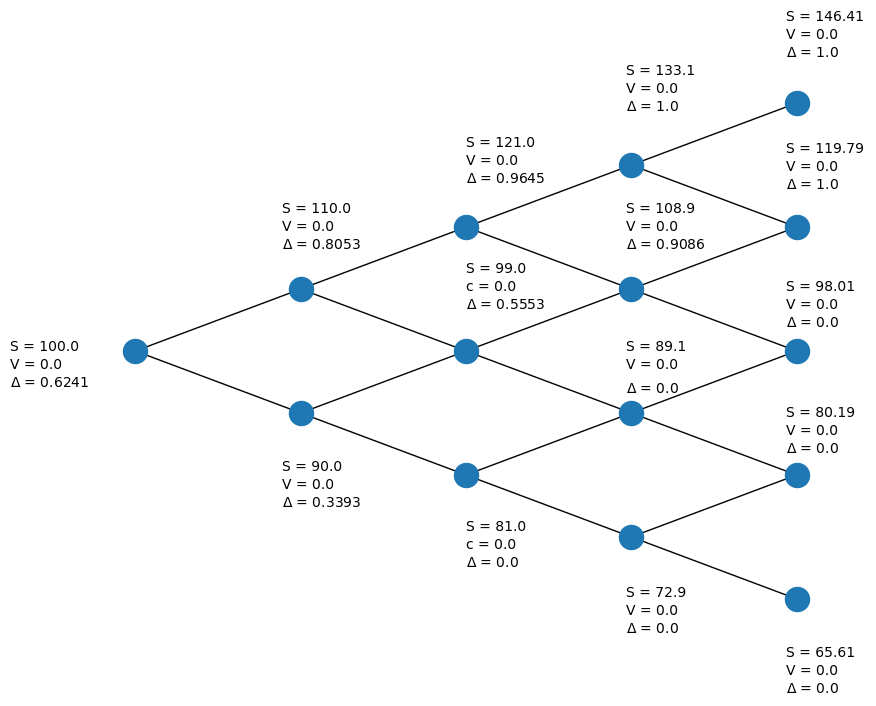

In [143]:
# Plot a 4-Step Binomial Tree 
plot_binomial_tree(underlying[0,0], underlying, option_price, delta) #px for price, opx for option value, d for delta